# Klein's curve

Demonstration of the functionality of CyclePainter. For more information see 3.3 of the thesis.

In [1]:
# Initialize jupyter notebook. Calling twice allegedly avoids a bug
%matplotlib notebook
%matplotlib notebook 

from cyclepainter import *

In [2]:
# Defining polynomial of Klein's curve
k.<rho>=CyclotomicField(3)
A2.<z,w>=AffineSpace(k,2)
klein = w^7-(z-1)*(z-rho)^2*(z-rho^2)^4

In [3]:
# Hand-picked cohomology basis
diffs = [
    (2*rho + 1)*(rho - z)*(rho^2 - z)^2/(7*w^5),
    -(2*rho + 1)*(rho - z)*(rho^2 - z)^3*rho/(7*w^6),
    (2*rho + 1)*(rho^2 - z)*rho^2/(7*w^3)
]

In [4]:
# Automorphism of Klein's curve
s = lambda z, w: (rho^2*z, rho^2*(z-1)*(z-rho)*(z - rho^2)^2/w^3)

In [5]:
# Define the CyclePainter object.
# kappa is the radius of avoidance of branch points used in abelfunctions.
cp = CyclePainter(klein, kappa=2./5.)

Curve:
    -z^7 + w^7 + (-2*rho - 3)*z^6 + (-3*rho - 3)*z^5 + (-3*rho - 1)*z^4 + (rho + 3)*z^3 + (3*rho + 3)*z^2 + (3*rho + 2)*z + (rho)

Kappa:
    0.400000000000000

Monodromy point:
      (-2-2.22044604925e-16j)

Ordering of sheets at the monodromy point:
   (0) (-1.8525191829298948+0.27922233999594903j)
   (1) (-1.373331634321685-1.2742655376519374j)
   (2) (-0.9367220022872395+1.622450100529147j)
   (3) (0.14000264579077581-1.8682054751679844j)
   (4) (0.6844459517243227+1.7439398434132551j)
   (5) (1.5479120780892694-1.0553485854358404j)
   (6) (1.790212143934459+0.5522073143174144j)
Discriminant points:
     -0.50000000000000000? - 0.866025403784439?*I
     1
     -0.50000000000000000? + 0.866025403784439?*I

Branch cut point:
      -0.500000000000000 - 2.22044604925031e-16*I

Branch point (0)
     Value: -0.50000000000000000? - 0.866025403784439?*I
     Permutation: (0 6 1 4 3 2 5)
Branch point (1)
     Value: 1
     Permutation: (0 1 3 5 6 4 2)
Branch point (2)
     Value: -0.

<IPython.core.display.Javascript object>


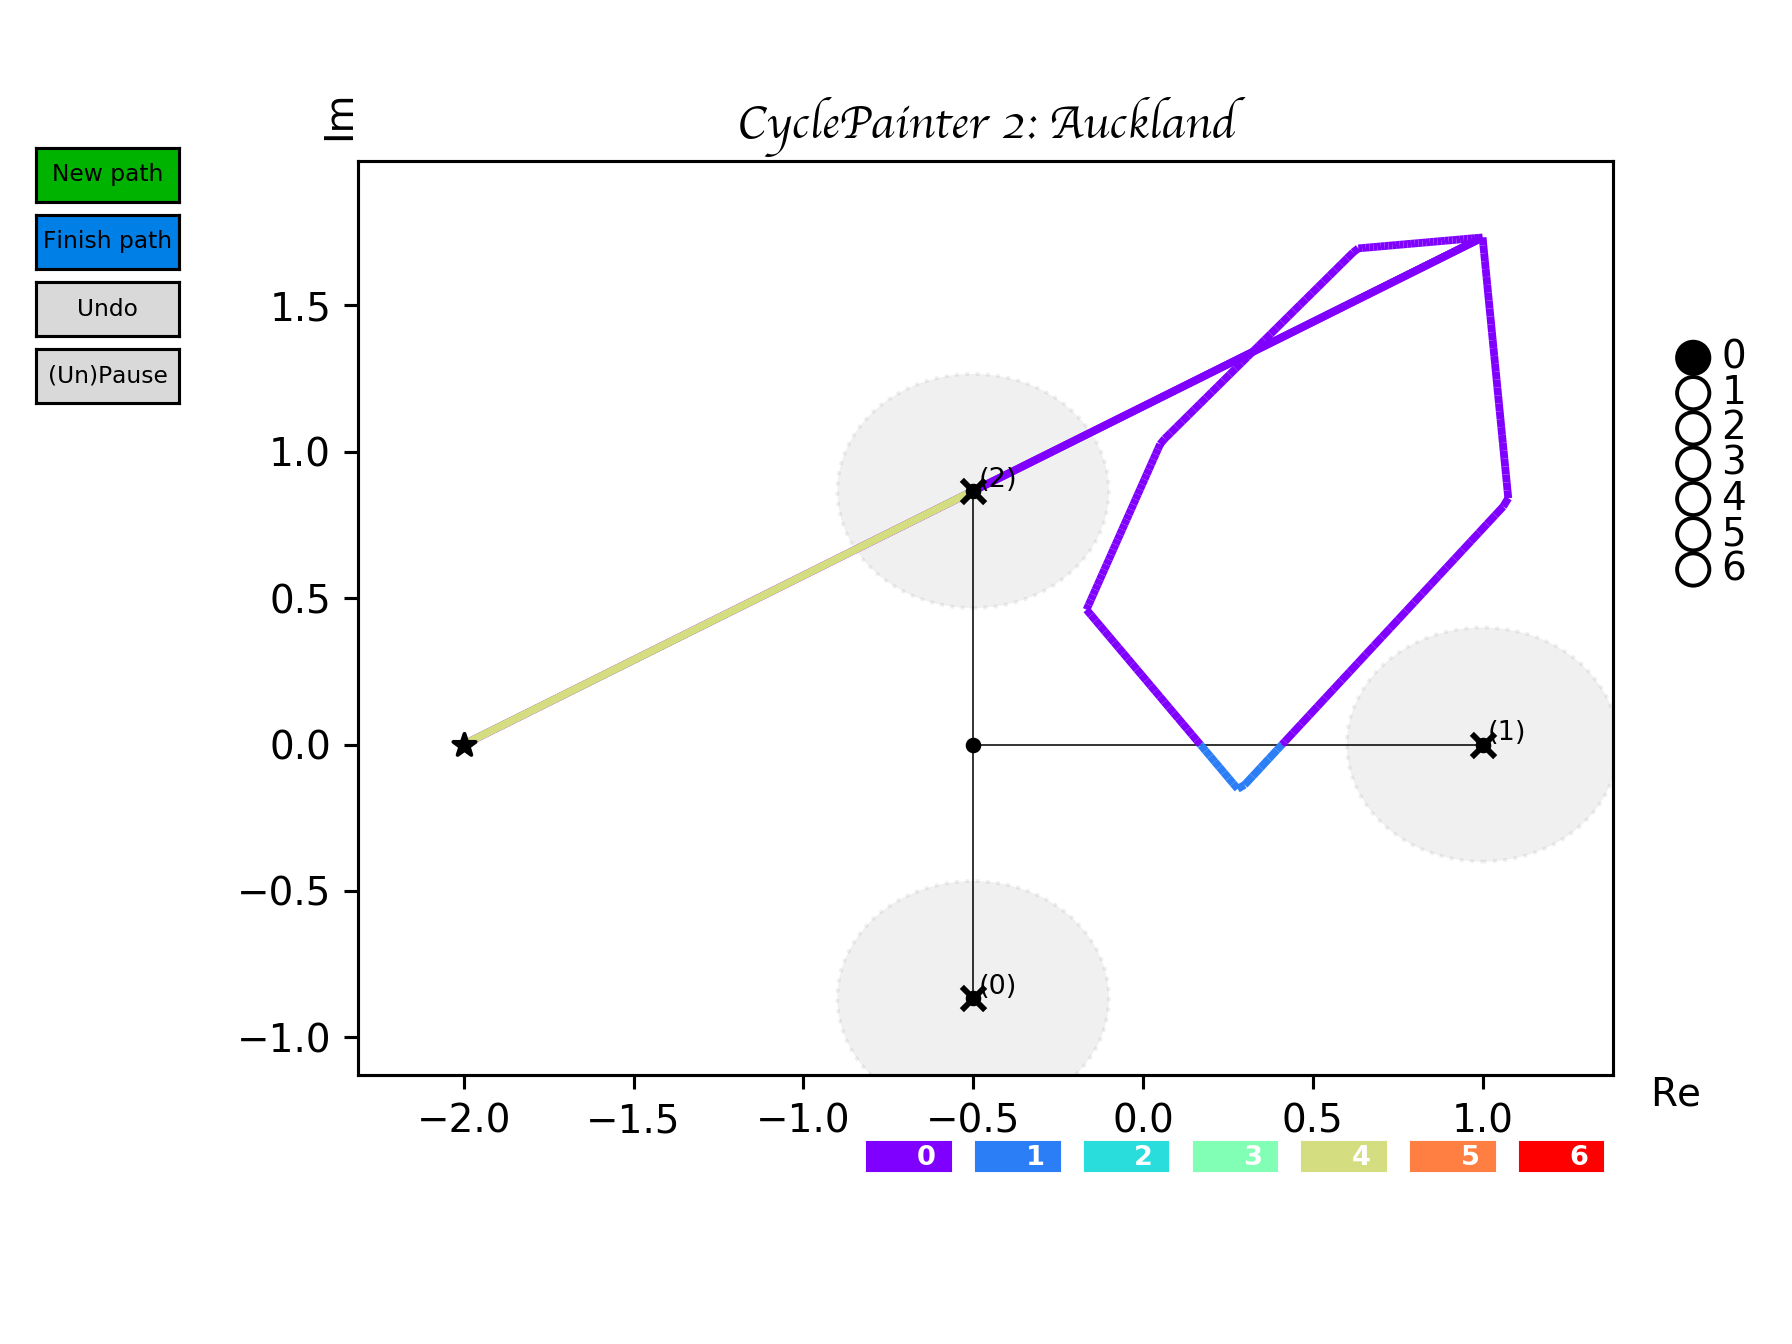

In [6]:
# Start the interactive plot.
#
# Workflow:
#    - to begin drawing a new path, click on "New path". 
#    - By clicking on the canvas, the path can be now defined. It is recommended to avoid the kappa 
#      circles around branch points. 
#    - Once you are satisfied with the path, click on "Finish path". The last point will be automatically
#.     connected to the monodromy point (denoted by star). Every path must be starting and ending in the 
#.     monodromy point.
#    - The radio-buttons on the right indicate the starting sheet of the path. This may be changed at any point.

# Go ahead now and define your own path by the above steps. Once "Finish path" button is clicked,
#     you may execute the next cell.

cp.start()

In [7]:
# To save a path for processing (possible only AFTER clicking "Finish path"), you need to call
p = cp.save_path('my_little_path')

# A unique name needs to be given.

Success: The path with name "my_little_path" has been saved.


In [8]:
# If you lose reference the path variable, it is now accessibly by its name
_ = cp.get_path('my_little_path')

In [9]:
# If you want to clean the canvas, you can run
cp.clear_canvas()

In [10]:
# And if you want to plot a saved path again
cp.plot_path('my_little_path')

In [11]:
# You may take a look at path's defining projection points and starting sheet
_, _ = p.starting_sheet, p.projection_points

In [12]:
# Or you may need to access the paths x/y values at some time t \in [0, 1]
p.get_x(0.42)

(-0.6057285780178923-0.42028535380867604j)

In [13]:
p.get_y(0.42) # (these are ordered)

array([-0.70659818+0.22057339j, -0.61300798-0.41491544j,
       -0.26810554+0.68996596j, -0.05781027-0.73796448j,
        0.37227604+0.63980009j,  0.54091975-0.50531122j,
        0.73232617+0.1078517j ])

In [14]:
# You can integrate an one-form over the path
p.integrate(diffs[0])

(-7.148448499805227e-12-3.6902075145617275e-11j)

In [15]:
# Or find the intersection numbers with other paths
p.intersection_number(p)

# Note: in extreme cases, I have encountered errors in the intersections numbers. Take with a grain of salt.

0

In [16]:
# We can also go back to cyclepainter object to find intersection matrix of multiple paths
cp.intersection_matrix(['my_little_path', 'my_little_path'])

matrix([[0, 0],
        [0, 0]])

In [17]:
# You can also apply an automorphism on the path (scroll up back to the plot to see it)
p.apply_automorphism(s)

# NOTE:
#   - the monodromy point will be sent to a different place, the ordering of the sheets is hence unreliable
#   - this function is meant for investigation only, to use the path, one should manually redraw it.

In [18]:
# To save all of the paths into a file for future use
cp.pickle_paths('pickled_paths_file.pickle')

In [19]:
# This created a new file in the working directory. To load paths from such a file
cp.load_paths('pickled_paths_file.pickle')

In [20]:
# Load pre-pickled paths for the Klein's curve
cp.load_paths('klein_curve_paths.pickle')

In [22]:
# These paths are now available
cp.saved_paths()

Saved paths:
    b3
    a1
    a3
    a2
    b1
    b2
    my_little_path


Curve:
    -z^7 + w^7 + (-2*rho - 3)*z^6 + (-3*rho - 3)*z^5 + (-3*rho - 1)*z^4 + (rho + 3)*z^3 + (3*rho + 3)*z^2 + (3*rho + 2)*z + (rho)

Kappa:
    0.400000000000000

Monodromy point:
      (-2-2.22044604925e-16j)

Ordering of sheets at the monodromy point:
   (0) (-1.8525191829298948+0.27922233999594903j)
   (1) (-1.373331634321685-1.2742655376519374j)
   (2) (-0.9367220022872395+1.622450100529147j)
   (3) (0.14000264579077581-1.8682054751679844j)
   (4) (0.6844459517243227+1.7439398434132551j)
   (5) (1.5479120780892694-1.0553485854358404j)
   (6) (1.790212143934459+0.5522073143174144j)
Discriminant points:
     -0.50000000000000000? - 0.866025403784439?*I
     1
     -0.50000000000000000? + 0.866025403784439?*I

Branch cut point:
      -0.500000000000000 - 2.22044604925031e-16*I

Branch point (0)
     Value: -0.50000000000000000? - 0.866025403784439?*I
     Permutation: (0 6 1 4 3 2 5)
Branch point (1)
     Value: 1
     Permutation: (0 1 3 5 6 4 2)
Branch point (2)
     Value: -0.

<IPython.core.display.Javascript object>


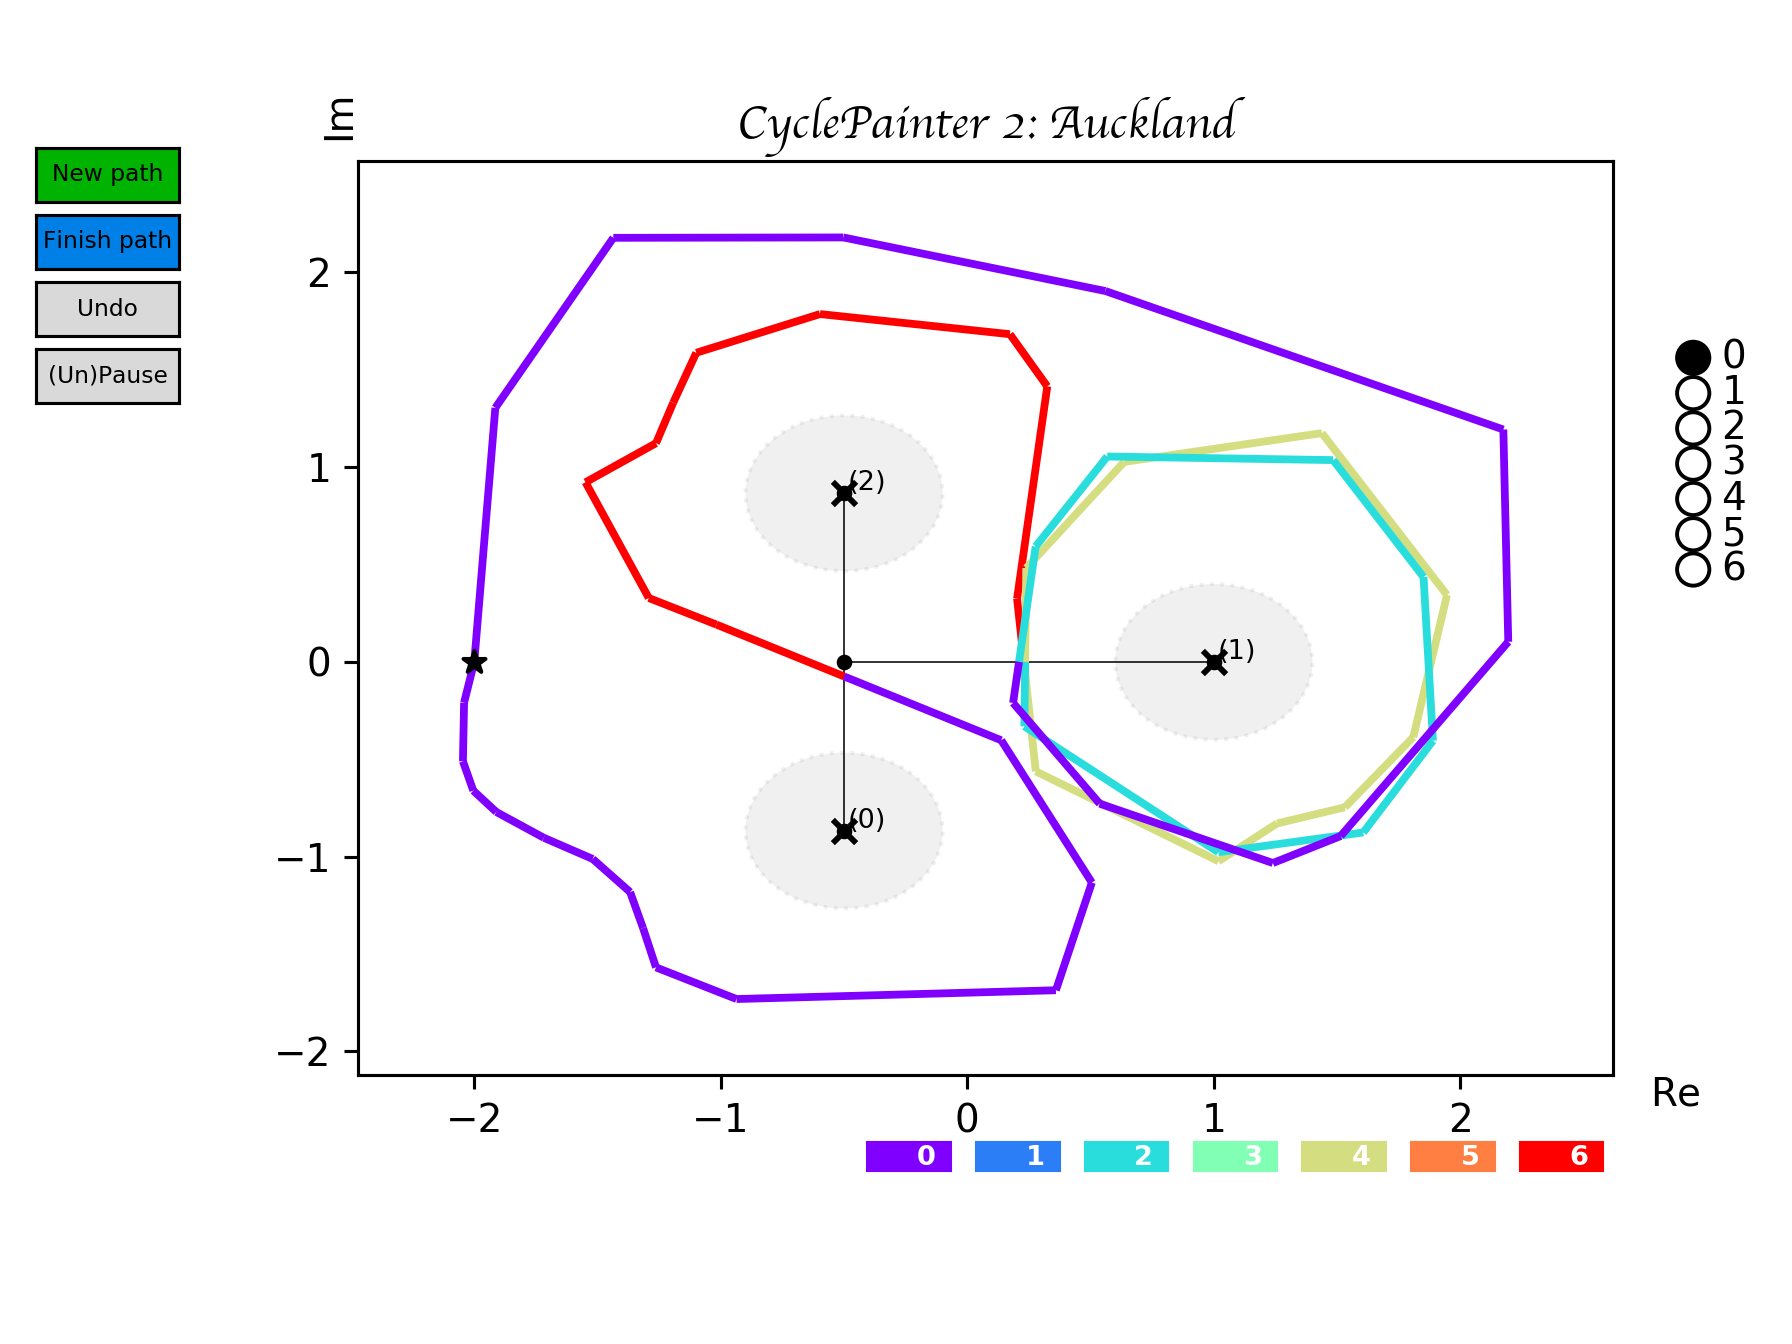

In [23]:
# I'll go ahead and open a new plot for visibility. Please go ahead and close the first one (right-top corner button)
cp.start()

In [24]:
# this is, by the way, how one of the monodromy paths looks like
cp.branch_points[0].show_permutation_path()

In [25]:
# and this is the first of the a-cycles we just loaded
cp.plot_path('a1')

In [26]:
# Verify the intersection matrix
cp.intersection_matrix(['a1', 'a2', 'a3', 'b1', 'b2', 'b3'])

matrix([[ 0,  0,  0,  1,  0,  0],
        [ 0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  1],
        [-1,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0,  0]])

In [27]:
# Good to go. Calculate the period matrix with this homology basis
a_cycles = ['a1', 'a2', 'a3']
b_cycles = ['b1', 'b2', 'b3']

cp.period_matrix(a_cycles, b_cycles, diffs)

matrix([[-1.20540013+0.27512471j,  1.74185366+1.38908194j,
          0.43020233+0.89332434j,  1.20540013+0.27512471j,
         -1.74185366+1.38908194j, -0.43020233+0.89332434j],
        [ 1.74185366+1.38908194j,  0.43020233+0.89332434j,
         -1.20540013+0.27512471j, -1.74185366+1.38908194j,
         -0.43020233+0.89332434j,  1.20540013+0.27512471j],
        [ 0.43020233+0.89332434j, -1.20540013+0.27512471j,
          1.74185366+1.38908194j, -0.43020233+0.89332434j,
          1.20540013+0.27512471j, -1.74185366+1.38908194j]])

In [28]:
# And finally, the highly-symmetric Riemann matrix
rm = cp.riemann_matrix(a_cycles, b_cycles, diffs)

In [29]:
np.round(rm, 9)

matrix([[-0.25+0.66143783j,  0.5 +0.j        ,  0.5 -0.j        ],
        [ 0.5 +0.j        , -0.25+0.66143783j,  0.5 +0.j        ],
        [ 0.5 +0.j        ,  0.5 +0.j        , -0.25+0.66143783j]])